Лабораторна робота 5

Сакуна Владислава, ФІТ 4-4

1. Прочитайте CSV файл spark.read.csv()

In [1]:
!pip install pyspark==3.0.1 py4j==0.10.9

from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, when
from pyspark.ml.feature import Imputer
import matplotlib.pyplot as plt
from pyspark.ml.feature import Imputer
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col as spark_col

spark = SparkSession.builder \
    .appName("Amazon Bestselling Books") \
    .getOrCreate()

df = spark.read.csv("/content/sample_data/bestsellers with categories.csv", header=True, inferSchema=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 20.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612223 sha256=ad8ce2e88c46fb526aaa41f83c7e977ac89a042877bd4093c7dfa36e7edfd707
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


2. Вивести схему даних за допомогою PrintSchema.

In [2]:
print("Схема даних:")
df.printSchema()

Схема даних:
root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



3. Вивести назви стовпців і типи даних за допомогою dtypes

In [3]:
print("\nНазви стовпців і типи даних:")
print(df.dtypes)


Назви стовпців і типи даних:
[('Name', 'string'), ('Author', 'string'), ('User Rating', 'double'), ('Reviews', 'int'), ('Price', 'int'), ('Year', 'int'), ('Genre', 'string')]


4. Виведіть перші п'ять рядків (використовується метод head)

In [4]:
print("\nПерші п'ять рядків:")
df.show(5)


Перші п'ять рядків:
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
only showing top 5 rows



5. Вивести перший рядок за допомогою first()

In [5]:
print("\nПерший рядок:")
print(df.first())


Перший рядок:
Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')


6. Зробіть опис датасету за допомогою describe()

In [6]:
print("\nОпис датасету:")
df.describe().show()


Опис датасету:
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                null|            null|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       null|
| stddev|                null|            null|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       null|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    max|You Are a Badass

7. Виведіть список стовпців за допомогою columns()

In [7]:
print("\nСписок стовпців:")
print(df.columns)


Список стовпців:
['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']


8. Виведіть загальну кількість рядків даних за допомогою count()

In [8]:
print("\nЗагальна кількість рядків даних:", df.count())


Загальна кількість рядків даних: 550


9. Перевірте, чи у всіх рядків вистачає даних. Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий.

In [9]:
from pyspark.sql.functions import col, when
from pyspark.sql.functions import mean

# Замінюємо пропущені значення на NaN та змінюємо тип даних на числовий
df = df.select([when(col(c).isNull(), float('nan')).otherwise(col(c)).alias(c) for c in df.columns])

10. Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float.
Про скільки книг зберігає дані датасет?

In [10]:
for col in df.columns:
    mean_value = df.select(mean(col)).collect()[0][0]
    df = df.withColumn(col, when(df[col].isNull(), mean_value).otherwise(df[col]))

# Змінюємо назви стовпців
df = df.toDF(*['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'])

# Знаходимо кількість книг у датасеті
books_count = df.count()
print("\nКількість книг у датасеті:", books_count)


Кількість книг у датасеті: 550


11. Змініть назви всіх колонок: назва з маленької букви, без пробілів через підкреслення.
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [11]:
df = df.toDF(*[col.lower().replace(' ', '_') for col in df.columns])

12. Знайдіть автора з найвищим рейтингом.

In [12]:
max_rating_author = df.orderBy(df['user_rating'].desc()).select('author').first()[0]
print("\nАвтор з найвищим рейтингом:", max_rating_author)


Автор з найвищим рейтингом: Bill Martin Jr.


13. Знайдіть автора з найнижчим рейтингом.

In [13]:
min_rating_author = df.orderBy(df['user_rating']).select('author').first()[0]
print("\nАвтор з найнижчим рейтингом:", min_rating_author)


Автор з найнижчим рейтингом: J.K. Rowling


14. Знайдіть автора, що має найбільшу кількіть рецензій.

In [14]:
max_reviews_author = df.orderBy(df['reviews'].desc()).select('author').first()[0]
print("\nАвтор з найбільшою кількістю рецензій:", max_reviews_author)


Автор з найбільшою кількістю рецензій: Delia Owens


15. Побудуйте гістограму рейтингу 10 найкращих книг (відібрати книги з найбільшим рейтингом).

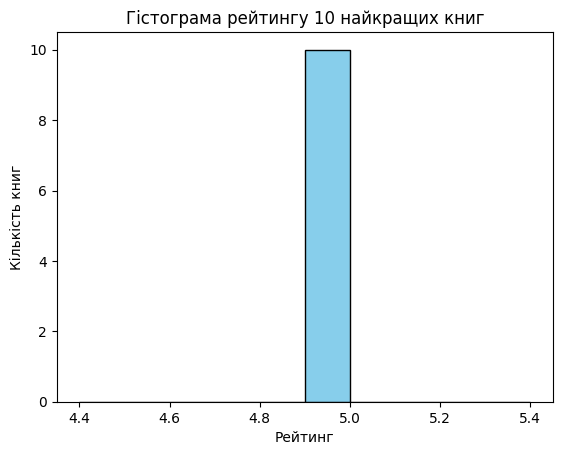

In [15]:
import matplotlib.pyplot as plt

top_10_books = df.orderBy(df['user_rating'].desc()).limit(10).toPandas()
plt.hist(top_10_books['user_rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Гістограма рейтингу 10 найкращих книг')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість книг')
plt.show()

16. Побудуйте матрицю кореляції для стовпчиків 'user_rating', 'reviews', 'price'.

In [16]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Об'єднуємо потрібні стовпці в вектор
assembler = VectorAssembler(inputCols=['user_rating', 'reviews', 'price'], outputCol='features')
df_vector = assembler.transform(df).select('features')

# Обчислюємо матрицю кореляції
correlation_matrix = Correlation.corr(df_vector, 'features').head()
correlation_array = correlation_matrix[0].toArray()

print("\nМатриця кореляції:")
print(correlation_array)


Матриця кореляції:
[[ 1.         -0.00172901 -0.13308629]
 [-0.00172901  1.         -0.10918188]
 [-0.13308629 -0.10918188  1.        ]]


Закриття SparkSession

In [17]:
spark.stop()